# The China Study and longevity

Today I want to revisit a subject I did a post on earlier. I recently started using Jupyter Notebook for writing blogs, and while I posted on this subject a while back, recent posts on Twitter prompted me to the idea that now might be a good time to revisit the subject. ![campbell](campbell.png)

Aparently a group of overzealous vegans has set out to get their hero, the author of the controversial  book *The China Study*, nominated for a Nobel prize in medicine. The book *The China Study* is a well written book that explores the hypothesis that animal sourced foods, most notably animal protein is responsible for awide range of human health conditions. The book, often refered to as *The Vegan Bible* gets its name from an equally named large schale epidemological study. Campbell is an eloquent writer with a good grasp on the use of narative structure. As an amateur mythpunk author, I respect good craftmanship when it comes to writing. But Campbell isn't being nominated for a Nobel prize in literature. His vegan fans are working hard to get Campbell nominated for a nobel prize in medicine. 

As said, the book The China Study, a book that argues against the consumption of things like animal protein, saturated fat and cholesterol is based on the equally named study. In this blog post I aim to unequivably show through a simple, almost trivial analysis, that *The China Study* book should be lauded as a wonderfull work of speculative fiction, not as an authorative work in the field of medicine. I am going to do this, not through arguing. We are going to look into the actual china study *data*. I will let the data do all the arguing for me. Campbells data. And I'm going to do this in a way that everybody can confirm or try to falsify. 

As said, I'm writing this blog post using Jupyter Notebook, and I'll share not only my post but also the notebook itself for anyone to play with. I invite you, the reader, to try running the analysis on your own system and if you wish to do so, to use the notebook to try and poke holes into the outcomes of this simple analysis.

### Getting Jupyter Notebook

I would want to advise using the Annaconda Python distribution. Not only does it come with Python and Jupyter Notebook ready to go, this python distribution comes with a number of handy Python libraries, including *pandas*, *numpy* and *mathplotlib*.

Once you have Annaconda installed you should be able to start Jupyter Notebook. You can create your own new notebook or, for example, load the notebook I used to create this blog post.

### base dependencies
The first thing we need to do in import our base dependencies for our notebook. The *pandas* library is an amazing Python library that can best be described as Excell on steroids as a Python library. It is a library that will allow us to load the data set and its parts into so called data frames and process these data frames in a way similar to how you would handle things in a spreadsheet program. The *math* library is simply the base math library of Python. We will be using this one only for the *pow* function. The *numpy* library, a library that also forms the foundation of *pandas*, is a library that makes working with vectors and matrices truly convenient programatically. Finaly the *mathplot* lib allows us to create visualizations of our data. The % line isa special Jupyter Notebook directive that allows us to easily integrate great visualizations into our notebook.

In [210]:
import pandas
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Getting the data from archive.org.

Before we can go any further, we first need to get our hands on the data set. The data has been publicly available for many years. Unfortunately the original site has gone ofline. But archive.org to the resque. We can still fetch the data from [here](http://web.archive.org/web/20040831100643if_/http://rum.ctsu.ox.ac.uk:80/~china/monograph/chdata.htm).

You will need to fetch the following files from the 1989 data set:

* CH89M.CSV : Mortality data
* CH89Q.CSV : Questionair data
* CH89DG.CSV: Diet data
* CHNAME.TXT: Description of the data columns

It is important to note that the three files we shall be using are all keyed by the following composit key:

* County
* Xiang
* Gender

We shall be looking at the combined gender data only in this analysis. 

### Longevity

We first start off with the mortality data file. Given that *The China Study* makes claims about nutrition and health and as we will aim to minimize the probability of spurious findings, we will zoom out to the least granular of all health outcomes: All Cause Mortality. The mortality data set has multiple ACM columns for different ages. We choose to look at a combined metric denoting *longivity* as the probability to live to the age of 80 years based on the ACM within differnt age groups for a given region. 

* M004: ALL CAUSES AGE 0-34 (stand. rate/100,000)
* M005: ALL CAUSES AGE 35-69 (stand. rate/1,000)
* M006: ALL CAUSES AGE 70-79 (stand. rate/1,000)

Our first step is to take the mortality data file and compute our longevity metric.

(array([ 2.,  3.,  6., 11.,  9., 12.,  9.,  4.,  4.,  5.]),
 array([ 7.66 , 11.396, 15.132, 18.868, 22.604, 26.34 , 30.076, 33.812,
        37.548, 41.284, 45.02 ]),
 <a list of 10 Patch objects>)

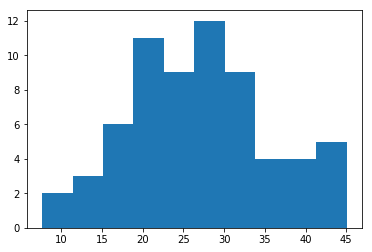

In [227]:
#Read the China Study Mortality data
mort89 = pandas.read_csv("CH89M.CSV")
#Clean up leading and trailing spaces from column names.
mort89.columns = list(map(lambda x: x.lstrip().rstrip(), mort89.columns))
#Strip everything but ACM for three age groups
mort89 = mort89[["County","Sex","Xiang","M004","M005","M006"]]
#Convert mortality string fields to proper floats if possible
for colname in ["M004","M005","M006"]:
    ocol = mort89[colname] #The old column
    ncol = []              #A brand new replacement column
    for value in ocol:
        #Take float converted value of None and add it to the replacement column
        try:
            as_float = float(value)
        except:
            as_float = None
        ncol.append(as_float)
    #Replace the original column with the float column
    mort89[colname] = ncol
#Drop any row that has a NaN entry
mort89.dropna(axis=0,inplace = True)
#Calculate probability to live to the age of 80 and add that probability to the dataframe
longevity_values = []
for index, row in mort89.iterrows():
    longevity = round(100*( \
            math.pow(1.0 - float(row["M004"]) / 100000,35) * \
            math.pow(1.0 - float(row["M005"]) / 1000,35) * \
            math.pow(1.0 - float(row["M006"]) / 1000,10)
        ),2)
    longevity_values.append(longevity)
mort89["longevity"] = longevity_values
#No more need for the ACM data.
mort89.drop(['M004', 'M005', 'M006'], axis=1, inplace=True)
#For our high level view we don't look at 
mort89_t = mort89[mort89["Sex"] == "T"]
mort89 = mort89_t.drop(["Sex"], axis=1)
#Let's look at the general shape of the longevity distribution.
plt.hist(mort89["longevity"],bins=10)

The above histogram shows the rough distribution of the probanility to live to an age of 80 years old in different regions. Note the wide ranfe of valuesfrom less than 10% to more than 40%. 

### Getting the average per-region body weight.

In our next step we are going to look at different fr food stufs. Many of these are in grams or micro grms per day per reference person. The reference person differs quite a bit in size and body weight though, so in order to normalize these data columns later on, we are going to have to grab the average body weight column from the questionaire file. 

(array([ 3.,  6.,  7.,  7., 11.,  6.,  5., 13.,  0.,  7.]),
 array([46.2 , 47.71, 49.22, 50.73, 52.24, 53.75, 55.26, 56.77, 58.28,
        59.79, 61.3 ]),
 <a list of 10 Patch objects>)

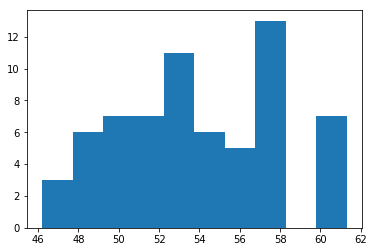

In [228]:
#Read the China Study Mortality data
questionair89 = pandas.read_csv("CH89Q.CSV")
#Clean up leading and trailing spaces from column names.
questionair89.columns = list(map(lambda x: x.lstrip().rstrip(), questionair89.columns))
#Strip everything but ACM for three age groups
questionair89 = questionair89[["County","Sex","Xiang","Q091"]]
for colname in ["Q091"]:
    ocol = questionair89[colname] #The old column
    ncol = []              #A brand new replacement column
    for value in ocol:
        #Take float converted value of None and add it to the replacement column
        try:
            as_float = float(value)
        except:
            as_float = None
        ncol.append(as_float)
    #Replace the original column with the float column
    questionair89[colname] = ncol
#Drop any row that has a NaN entry
questionair89.dropna(axis=0,inplace = True)
#For our high level view we don't look at sex
questionair89 = questionair89[questionair89["Sex"] == "T"]
questionair89 = questionair89.drop(["Sex"], axis=1)
chinastudy89 = pandas.merge(mort89, questionair89,  how='left')
plt.hist(chinastudy89["Q091"],bins=10)

Above is the rough distribution of average per-region body weight. Again quite some spread. Not as much as for our longevity metric, but still.

### Food stuff

Now we come to adding the food stuff to our data frame. We first filter out only those columns expressed in grams or mili grams per day per reference person. Then we normalize our data by dividing the cell values by the region body weight as to get all metrics defined as gram per day per kg of body weight. When all of the new columns are added to our data frame, we can drop the composite key of County/Xiang/Sex as we will no longer need these.

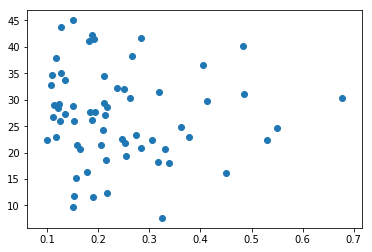

In [229]:
relevant_diet_columns = ["County","Sex","Xiang"]
long_column_names = ["County","Sex","Xiang"]
with open("CHNAME.TXT") as tf:
    for line in tf:
        if "g/day/reference man" in line:
            relevant_diet_columns.append(line[:4])
            long_column_names.append(line[28:-1].split(" (")[0])
diet89 = pandas.read_csv("CH89DG.CSV")
#Clean up leading and trailing spaces from column names.
diet89.columns = list(map(lambda x: x.lstrip().rstrip(), diet89.columns))
#Strip everything but ACM for three age groups
diet89 = diet89[relevant_diet_columns]
for colname in relevant_diet_columns[3:]:
    ocol = diet89[colname] #The old column
    ncol = []              #A brand new replacement column
    for value in ocol:
        #Take float converted value of None and add it to the replacement column
        try:
            as_float = float(value)
        except:
            as_float = None
        ncol.append(as_float)
    #Replace the original column with the float column
    diet89[colname] = ncol
#Drop any row that has a NaN entry
diet89.dropna(axis=0,inplace = True)
diet89.columns = long_column_names
#For our high level view we don't look at sex
diet89 = diet89[diet89["Sex"] == "T"]
diet89 = diet89.drop(["Sex"], axis=1) 
chinastudy89 = pandas.merge(chinastudy89, diet89,  how='left')
for col in long_column_names[3:]:
    chinastudy89[col] = chinastudy89[col] / chinastudy89["Q091"]
chinastudy89.drop(["County","Xiang","Q091"], axis=1,inplace = True)
x=chinastudy89["TOTAL NEUTRAL DETERGENT FIBRE INTAKE"].values
y=chinastudy89["longevity"].values
plt.scatter(x, y)

As an example, we look at the scatter plot of longevity against fibre intake. 

(array([ 2.,  3.,  6., 11.,  9., 12.,  9.,  4.,  4.,  5.]),
 array([ 7.66 , 11.396, 15.132, 18.868, 22.604, 26.34 , 30.076, 33.812,
        37.548, 41.284, 45.02 ]),
 <a list of 10 Patch objects>)

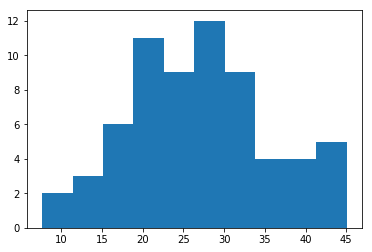

In [231]:
plt.hist(y,bins=10)

And the histogram of fibre intake per day per kg of body mass.

### correlation

Now we get to the interesting part. So far all we have done is preprocessing the data as to get it into our data frame in the way we need it to get *pandas* to do its magic. What we do now is we look at those food stuff intake variables that correlate so much with longevity, in a positive way, that at least 7% of the longevity outcome could potentially be explained by a lineair regression against the food stuff variable. 


In [247]:
cor=chinastudy89.corr()["longevity"]
goodfood = cor[cor>math.sqrt(0.07)]
goodfood = goodfood[goodfood<1.0]
goodfood.sort_values(ascending=False)

INTAKE OF 16:0                                0.338789
SATURATED FATTY ACID INTAKE                   0.333422
CHOLESTEROL INTAKE                            0.320632
INTAKE OF 18:0                                0.320519
MONOUNSATURATED FATTY ACID INTAKE             0.319008
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE    0.318526
INTAKE OF 18:1                                0.316000
RED MEAT                                      0.314976
MEAT INTAKE                                   0.314422
INTAKE OF 16:1                                0.281419
INTAKE OF 20:4                                0.277645
ANIMAL PROTEIN INTAKE                         0.269695
TOTAL LIPID INTAKE                            0.267962
ANIMAL FOOD INTAKE                            0.267711
Name: longevity, dtype: float64

Well, this isn't what Mr Campbell had us expecting. Saturated fats and cholesterol dominate the list.  For a data set that is supposed to contain compelling and irrefutable evidence that animal based foods, most notably animal protein is supposed to be so bad for us that addopting a vegan lifestyle could safe us from an early grave, this list is quite different from what we would expect it to be. 
If we take the more conservative 10% treshold, still saturated fat, most notably palmitic acid stearic acid and cholesterol top of the list.

Now lets look at the other side of the coin.

In [257]:
badfood = cor[cor<-math.sqrt(0.07)]
badfood.sort_values(ascending=False)

POTASSIUM INTAKE    -0.270135
PLANT FOOD INTAKE   -0.303232
SPICE INTAKE        -0.419755
Name: longevity, dtype: float64

Again not what Mr Campbell would have us expect after reading his book. The R squared for plant based foods only just escapes the 10% treshold. Let us look at a few of the columns that do make the 10% mark for R squared.

In [258]:


goodfood = cor[cor>math.sqrt(0.1)]
goodfood = goodfood[goodfood<1.0]
goodfood.sort_values(ascending=False)
#x=chinastudy89["SATURATED FATTY ACID INTAKE"].values
#plt.scatter(x, y)

INTAKE OF 16:0                                0.338789
SATURATED FATTY ACID INTAKE                   0.333422
CHOLESTEROL INTAKE                            0.320632
INTAKE OF 18:0                                0.320519
MONOUNSATURATED FATTY ACID INTAKE             0.319008
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE    0.318526
Name: longevity, dtype: float64

In [259]:
badfood = cor[cor<-math.sqrt(0.1)]
badfood.sort_values(ascending=False)

SPICE INTAKE   -0.419755
Name: longevity, dtype: float64

In [262]:
interesting = chinastudy89[["INTAKE OF 16:0",
                            "SATURATED FATTY ACID INTAKE",
                            "CHOLESTEROL INTAKE",
                            "INTAKE OF 18:0",
                            "MONOUNSATURATED FATTY ACID INTAKE",
                            "TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE",
                            "SPICE INTAKE"]]
interesting.corr()

INTAKE OF 16:0  \
INTAKE OF 16:0                                    1.000000   
SATURATED FATTY ACID INTAKE                       0.985032   
CHOLESTEROL INTAKE                                0.653803   
INTAKE OF 18:0                                    0.955669   
MONOUNSATURATED FATTY ACID INTAKE                 0.978646   
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE        0.974084   
SPICE INTAKE                                     -0.108781   

                                            SATURATED FATTY ACID INTAKE  \
INTAKE OF 16:0                                                 0.985032   
SATURATED FATTY ACID INTAKE                                    1.000000   
CHOLESTEROL INTAKE                                             0.675034   
INTAKE OF 18:0                                                 0.985912   
MONOUNSATURATED FATTY ACID INTAKE                              0.941295   
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE                     0.932656   
SPICE INTAKE                                                  -0.115341   

                                            CHOLESTEROL INTAKE  \
INTAKE OF 16:0                                        0.653803   
SATURATED FATTY ACID INTAKE                           0.675034   
CHOLESTEROL INTAKE                                    1.000000   
INTAKE OF 18:0                                        0.645144   
MONOUNSATURATED FATTY ACID INTAKE                     0.652127   
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE            0.638503   
SPICE INTAKE                                          0.100037   

                                            INTAKE OF 18:0  \
INTAKE OF 16:0                                    0.955669   
SATURATED FATTY ACID INTAKE                       0.985912   
CHOLESTEROL INTAKE                                0.645144   
INTAKE OF 18:0                                    1.000000   
MONOUNSATURATED FATTY ACID INTAKE                 0.903516   
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE        0.894436   
SPICE INTAKE                                     -0.109789   

                                            MONOUNSATURATED FATTY ACID INTAKE  \
INTAKE OF 16:0                                                       0.978646   
SATURATED FATTY ACID INTAKE                                          0.941295   
CHOLESTEROL INTAKE                                                   0.652127   
INTAKE OF 18:0                                                       0.903516   
MONOUNSATURATED FATTY ACID INTAKE                                    1.000000   
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE                           0.999485   
SPICE INTAKE                                                        -0.067324   

                                            TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE  \
INTAKE OF 16:0                                                                0.974084   
SATURATED FATTY ACID INTAKE                                                   0.932656   
CHOLESTEROL INTAKE                                                            0.638503   
INTAKE OF 18:0                                                                0.894436   
MONOUNSATURATED FATTY ACID INTAKE                                             0.999485   
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE                                    1.000000   
SPICE INTAKE                                                                 -0.069250   

                                            SPICE INTAKE  
INTAKE OF 16:0                                 -0.108781  
SATURATED FATTY ACID INTAKE                    -0.115341  
CHOLESTEROL INTAKE                              0.100037  
INTAKE OF 18:0                                 -0.109789  
MONOUNSATURATED FATTY ACID INTAKE              -0.067324  
TOTAL n9 MONOUNSATURATED FATTY ACID INTAKE     -0.069250  
SPICE INTAKE                                    1.000000

Looks like our MUFA and SFA intake is corrlated too strong to look at these variables other than as one. Lets look at some more stuff lower down the line: 

In [266]:
interesting = chinastudy89[["SATURATED FATTY ACID INTAKE",
                            "MONOUNSATURATED FATTY ACID INTAKE",
                            "CHOLESTEROL INTAKE",
                            "ANIMAL PROTEIN INTAKE",
                            "MEAT INTAKE"]]
interesting.corr()

SATURATED FATTY ACID INTAKE  \
SATURATED FATTY ACID INTAKE                           1.000000   
MONOUNSATURATED FATTY ACID INTAKE                     0.941295   
CHOLESTEROL INTAKE                                    0.675034   
ANIMAL PROTEIN INTAKE                                 0.634446   
MEAT INTAKE                                           0.803585   

                                   MONOUNSATURATED FATTY ACID INTAKE  \
SATURATED FATTY ACID INTAKE                                 0.941295   
MONOUNSATURATED FATTY ACID INTAKE                           1.000000   
CHOLESTEROL INTAKE                                          0.652127   
ANIMAL PROTEIN INTAKE                                       0.576671   
MEAT INTAKE                                                 0.724846   

                                   CHOLESTEROL INTAKE  ANIMAL PROTEIN INTAKE  \
SATURATED FATTY ACID INTAKE                  0.675034               0.634446   
MONOUNSATURATED FATTY ACID INTAKE            0.652127               0.576671   
CHOLESTEROL INTAKE                           1.000000               0.917797   
ANIMAL PROTEIN INTAKE                        0.917797               1.000000   
MEAT INTAKE                                  0.800527               0.815691   

                                   MEAT INTAKE  
SATURATED FATTY ACID INTAKE           0.803585  
MONOUNSATURATED FATTY ACID INTAKE     0.724846  
CHOLESTEROL INTAKE                    0.800527  
ANIMAL PROTEIN INTAKE                 0.815691  
MEAT INTAKE                           1.000000

The correlations speak for themselves, the top X correlations for longevity are relatively strongly correlated amongst themselves. It is likely that multiple of these columns are indeed major contributors to longevity, yet given the inter-food correlations, it is quite impossible to isolate these from the variables that are just along for the ride.

So from this data, can we claim that either SFA,cholesterol, meat or animal protein contributes to increased longevity? No, that would be a way too strong claim based on this data. We can say though that it is very unlikely any of the top X variables, including SFA, cholesterol, animal protein and meat has significant decremental effect on longevity. A claim that while the book does not make it explicitly is implied by the long list of adverse health affects the book claims flow causally from the consumption of these animal sourced substances.

The above analysis is trivially simple. Just data preprocessing simple correlations and filtering, using the most high-level overview the data allows for regarding food intake and health. The possible effect of different foods on longevity. No massaging of the data, no statistical tricks, questionable adjustments for, etc. Just a simple matrix of correlation cooeficients showing just how unlikely the sum of all claims made by Campbell must be considered to be. 

Campbell managed to spin this study to convey a proteinophobic and anti animal-sourced foods message that, as could be expected, has been rather well received by the vegan community. So much so that that community is now setting out to get Campbell nominated for a Nobel prize.

I'll let Campbell's data vs his book speak for themselves here. Does Campbell deserve a being nominated for such a prestigeous prize? Well, I'll leave you all with this thought.

![quote](download.jpeg)

The Jupyter Notebook of this blog post is available [here](). Please use is to look at the data and if there is any oversight in this almost trivial analysis please comment below. 

